In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [24]:
X_train,y_train=train['features'], train['labels']
X_validation,y_validation=valid['features'], valid['labels']
X_test,y_test=test['features'], test['labels']

In [25]:
X_train.shape

(34799, 32, 32, 3)

In [26]:
y_train.shape

(34799,)

8

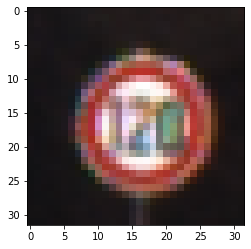

In [27]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

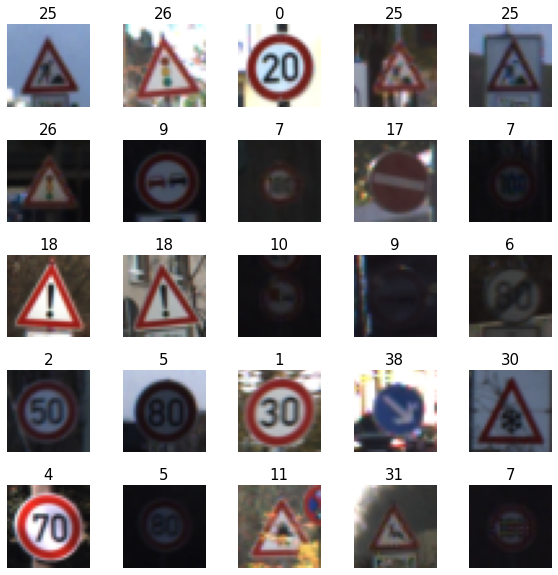

In [28]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# subplot return the figure object and axes object

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

    

        

In [29]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [30]:
X_train_gray = np.sum(X_train/3, axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3,keepdims=True)

In [31]:
X_train_gray.shape

(34799, 32, 32, 1)

In [32]:
X_train_gray_norm=(X_train_gray - 128)/128
X_test_gray_norm=(X_test_gray - 128)/128
X_validation_gray_norm=(X_validation_gray - 128)/128

In [33]:
X_train_gray_norm

array([[[[-0.73697917],
         [-0.73958333],
         [-0.73958333],
         ...,
         [-0.76041667],
         [-0.75520833],
         [-0.7421875 ]],

        [[-0.7421875 ],
         [-0.7421875 ],
         [-0.7421875 ],
         ...,
         [-0.74739583],
         [-0.75520833],
         [-0.74479167]],

        [[-0.74739583],
         [-0.73958333],
         [-0.73958333],
         ...,
         [-0.75      ],
         [-0.74479167],
         [-0.74479167]],

        ...,

        [[-0.77864583],
         [-0.76822917],
         [-0.76041667],
         ...,
         [-0.77083333],
         [-0.76302083],
         [-0.77604167]],

        [[-0.77864583],
         [-0.77864583],
         [-0.765625  ],
         ...,
         [-0.75520833],
         [-0.765625  ],
         [-0.765625  ]],

        [[-0.77864583],
         [-0.78125   ],
         [-0.77604167],
         ...,
         [-0.7578125 ],
         [-0.765625  ],
         [-0.77083333]]],


       [[[ 0.0390625 ],


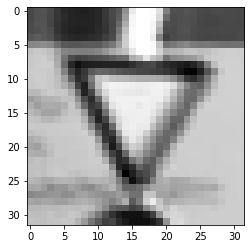

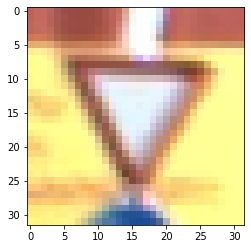

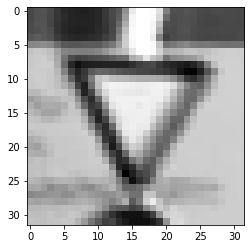

In [34]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [37]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()
CNN.add(layers.Conv2D(6, (5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())
CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

In [39]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=CNN.fit(X_train_gray_norm,
               y_train,
               batch_size=500,
               epochs=50,
               verbose=1,
               validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 24s 695us/sample - loss: 0.5883 - accuracy: 0.8261 - val_loss: 0.6698 - val_accuracy: 0.8034
Epoch 2/50
34799/34799 [==============================] - 24s 699us/sample - loss: 0.5167 - accuracy: 0.8474 - val_loss: 0.6295 - val_accuracy: 0.8152
Epoch 3/50
34799/34799 [==============================] - 24s 693us/sample - loss: 0.4609 - accuracy: 0.8649 - val_loss: 0.5915 - val_accuracy: 0.8279
Epoch 4/50
34799/34799 [==============================] - 24s 693us/sample - loss: 0.4076 - accuracy: 0.8810 - val_loss: 0.5769 - val_accuracy: 0.8376
Epoch 5/50
34799/34799 [==============================] - 24s 689us/sample - loss: 0.3638 - accuracy: 0.8934 - val_loss: 0.5826 - val_accuracy: 0.8356
Epoch 6/50
34799/34799 [==============================] - 24s 688us/sample - loss: 0.3334 - accuracy: 0.9022 - val_loss: 0.5675 - val_accuracy: 0.8440
Epoch 7/50
34799/34799 [=====================

In [41]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 418us/sample - loss: 0.9924 - accuracy: 0.7621
Test Accuracy: 0.7620744109153748


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation_loss')
plt.title('Training and validation loss')

In [ ]:
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'ro',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation_accuracy)
plt.title('Training and validation accuracy')

In [ ]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    